In [1]:
import pandas as pd

# Load the dataset
file_path = 'Epileptic Seizure Recognition.csv'
data = pd.read_csv(file_path)

# Display basic information and the first few rows of the dataset
data.info()
data.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11500 entries, 0 to 11499
Columns: 180 entries, Unnamed to y
dtypes: int64(179), object(1)
memory usage: 15.8+ MB


,Unnamed,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X170,X171,X172,X173,X174,X175,X176,X177,X178,y
0,X21.V1.791,135,190,229,223,192,125,55,-9,-33,...,-17,-15,-31,-77,-103,-127,-116,-83,-51,4
1,X15.V1.924,386,382,356,331,320,315,307,272,244,...,164,150,146,152,157,156,154,143,129,1
2,X8.V1.1,-32,-39,-47,-37,-32,-36,-57,-73,-85,...,57,64,48,19,-12,-30,-35,-35,-36,5
3,X16.V1.60,-105,-101,-96,-92,-89,-95,-102,-100,-87,...,-82,-81,-80,-77,-85,-77,-72,-69,-65,5
4,X20.V1.54,-9,-65,-98,-102,-78,-48,-16,0,-21,...,4,2,-12,-32,-41,-65,-83,-89,-73,5


In [2]:
# Drop the 'Unnamed' column if it exists
if 'Unnamed' in data.columns:
    data.drop(columns=['Unnamed'], inplace=True)

# Analyze the distribution of the target variable 'y'
target_distribution = data['y'].value_counts()
print("Target Class Distribution:\n", target_distribution)


Target Class Distribution:
 y
4    2300
1    2300
5    2300
2    2300
3    2300
Name: count, dtype: int64


In [3]:
# Check for missing values
missing_values = data.isnull().sum()
print("Missing Values in Each Column:\n", missing_values)


Missing Values in Each Column:
 X1      0
X2      0
X3      0
X4      0
X5      0
       ..
X175    0
X176    0
X177    0
X178    0
y       0
Length: 179, dtype: int64


In [58]:
# Get summary statistics of the dataset
print("\nSummary statistics:")
print(data.describe())


Summary statistics:
                 X1            X2            X3            X4            X5  \
count  11500.000000  11500.000000  11500.000000  11500.000000  11500.000000   
mean     -11.581391    -10.911565    -10.187130     -9.143043     -8.009739   
std      165.626284    166.059609    163.524317    161.269041    160.998007   
min    -1839.000000  -1838.000000  -1835.000000  -1845.000000  -1791.000000   
25%      -54.000000    -55.000000    -54.000000    -54.000000    -54.000000   
50%       -8.000000     -8.000000     -7.000000     -8.000000     -8.000000   
75%       34.000000     35.000000     36.000000     36.000000     35.000000   
max     1726.000000   1713.000000   1697.000000   1612.000000   1518.000000   

                 X6            X7           X8           X9           X10  \
count  11500.000000  11500.000000  11500.00000  11500.00000  11500.000000   
mean      -7.003478     -6.502087     -6.68713     -6.55800     -6.168435   
std      161.328725    161.467837   

C:\Users\Eshitha.I\AppData\Local\Temp\ipykernel_7920\400853799.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='y', data=data, palette='viridis')


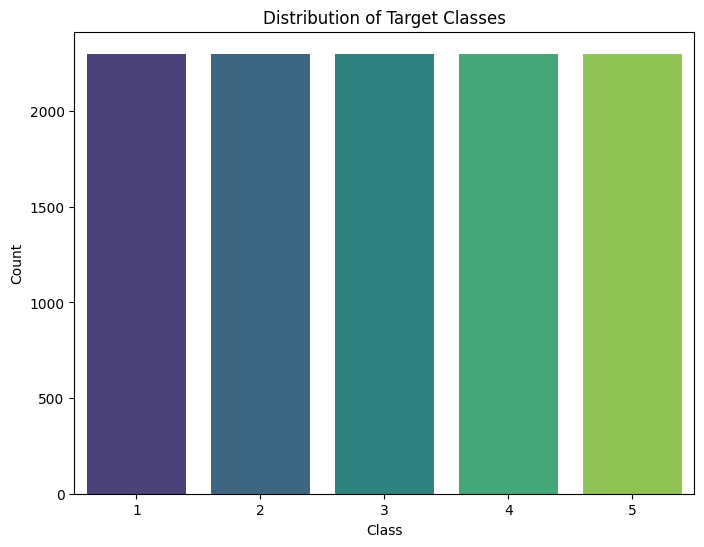

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the distribution of target classes
plt.figure(figsize=(8, 6))
sns.countplot(x='y', data=data, palette='viridis')
plt.title('Distribution of Target Classes')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


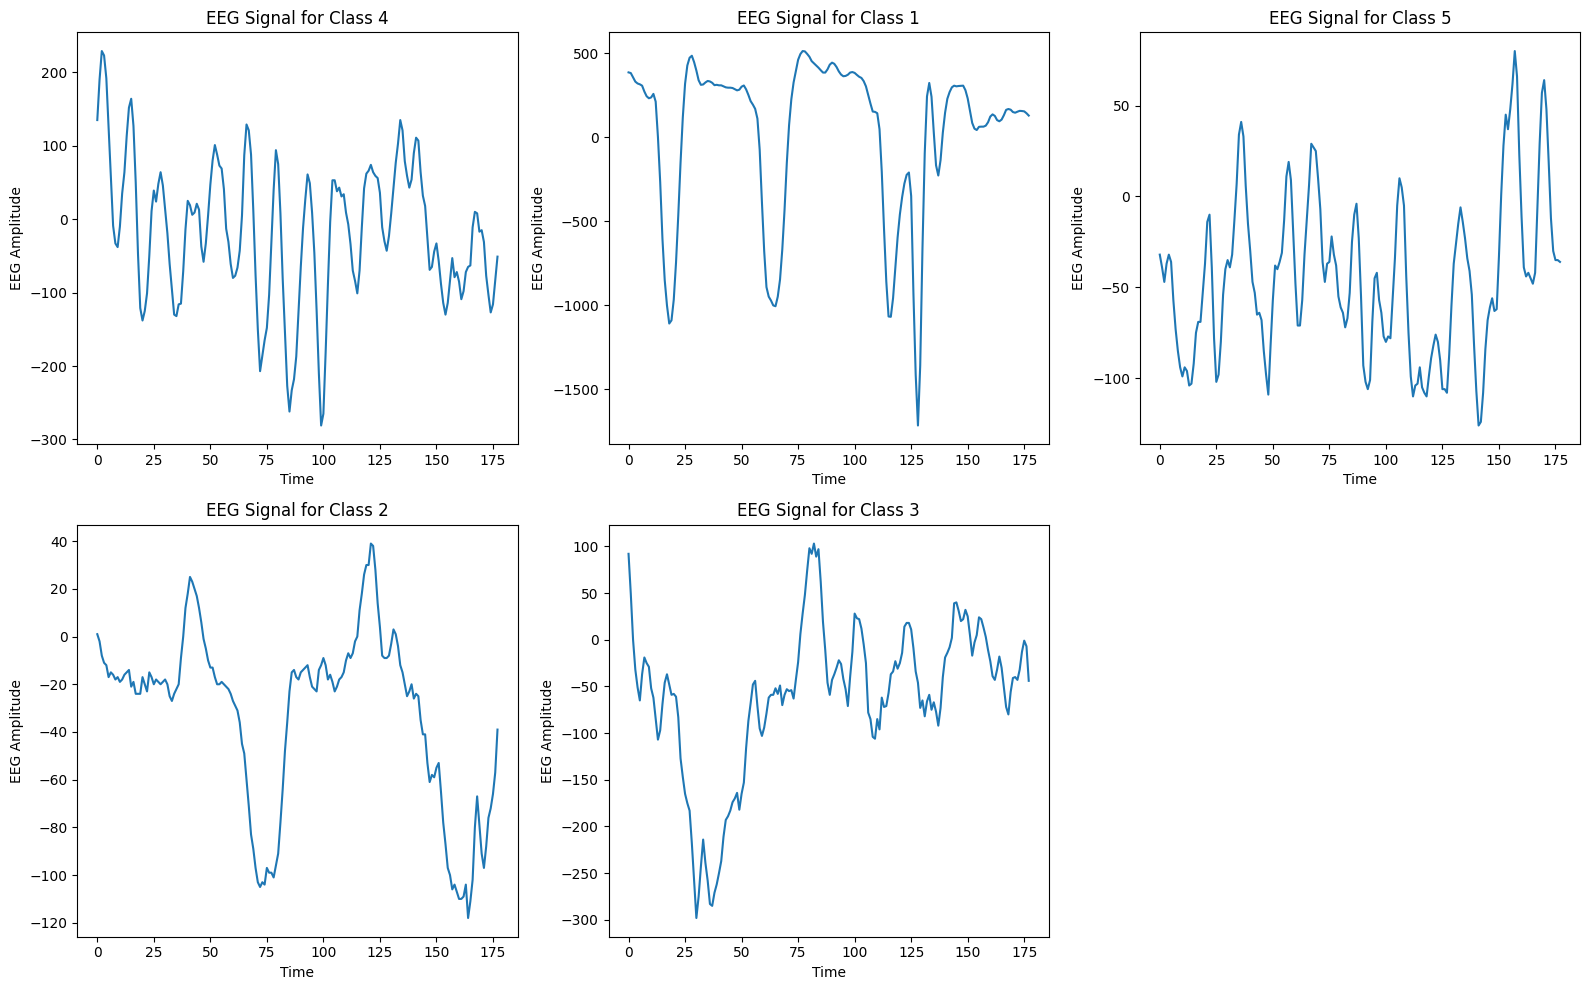

In [5]:
# Visualize some EEG signals for different classes
sample_size = 5
classes = data['y'].unique()

plt.figure(figsize=(16, 10))

for i, cls in enumerate(classes, 1):
    plt.subplot(2, 3, i)
    sample = data[data['y'] == cls].iloc[0, :-1].values  # Exclude the target column
    plt.plot(sample)
    plt.title(f'EEG Signal for Class {cls}')
    plt.xlabel('Time')
    plt.ylabel('EEG Amplitude')

plt.tight_layout()
plt.show()


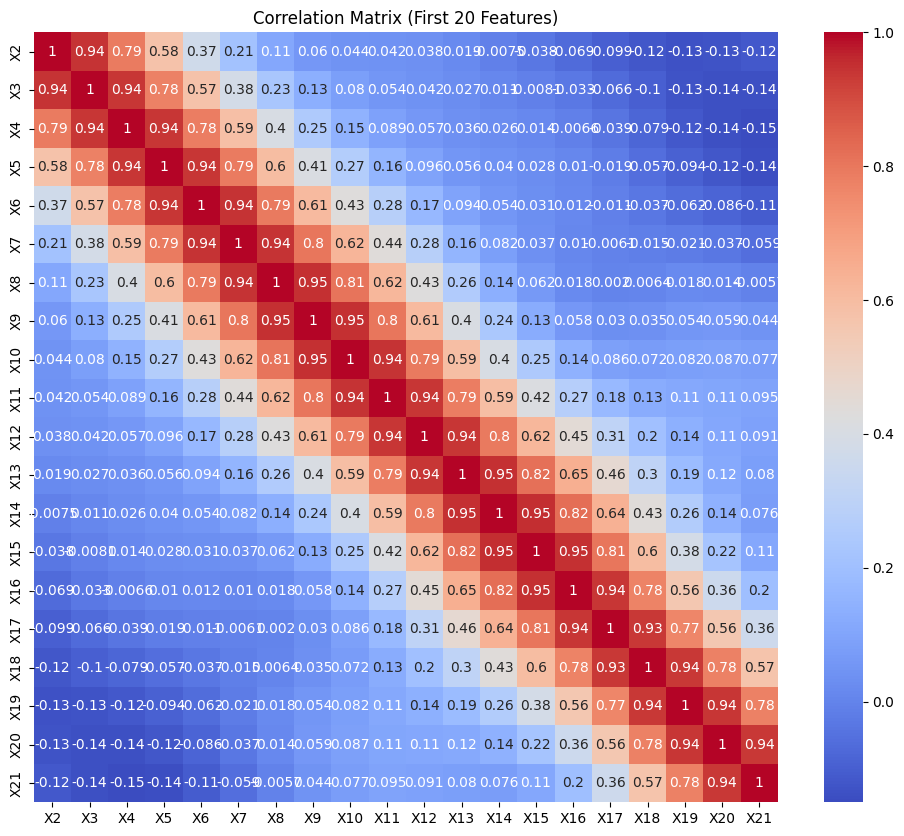

In [20]:
# Correlation matrix of the first 20 features
plt.figure(figsize=(12, 10))
correlation_matrix = data.iloc[:, 1:21].corr()  # Exclude the target column for correlation
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix (First 20 Features)')
plt.show()

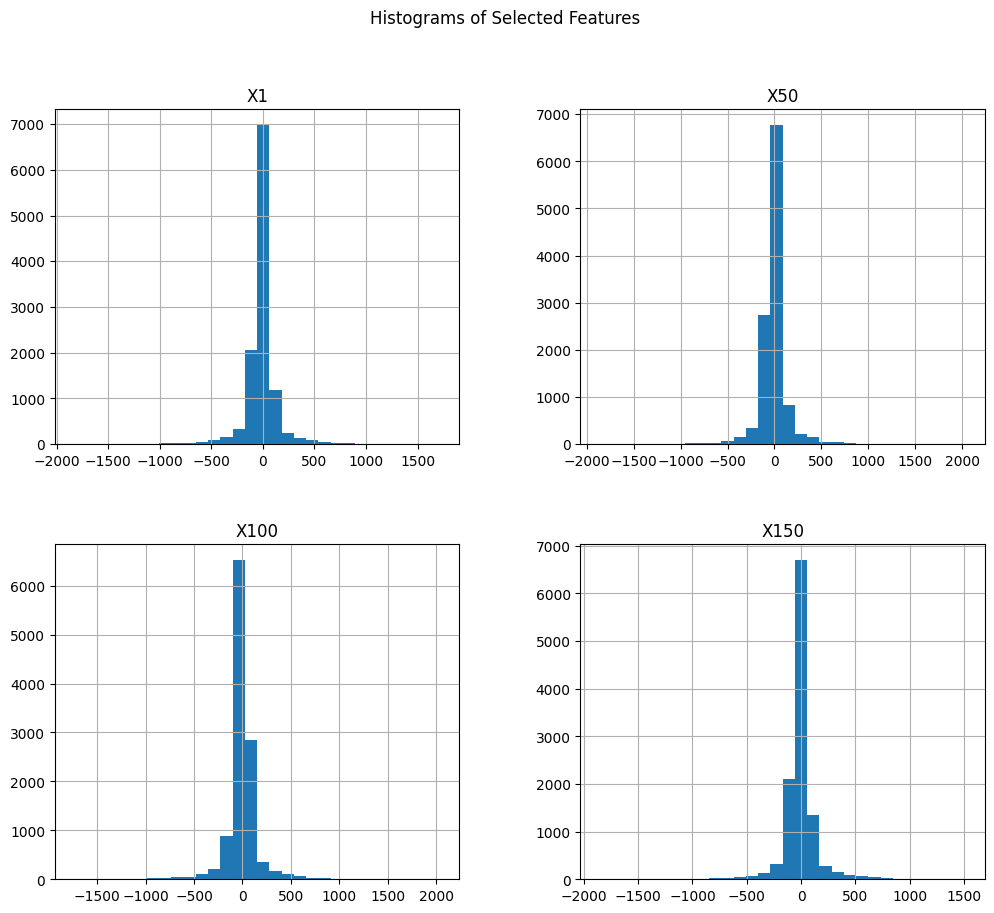

In [60]:
# Importing necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Histograms of some selected features
selected_features = ['X1', 'X50', 'X100', 'X150']
data[selected_features].hist(bins=30, figsize=(12, 10))
plt.suptitle('Histograms of Selected Features')
plt.show()


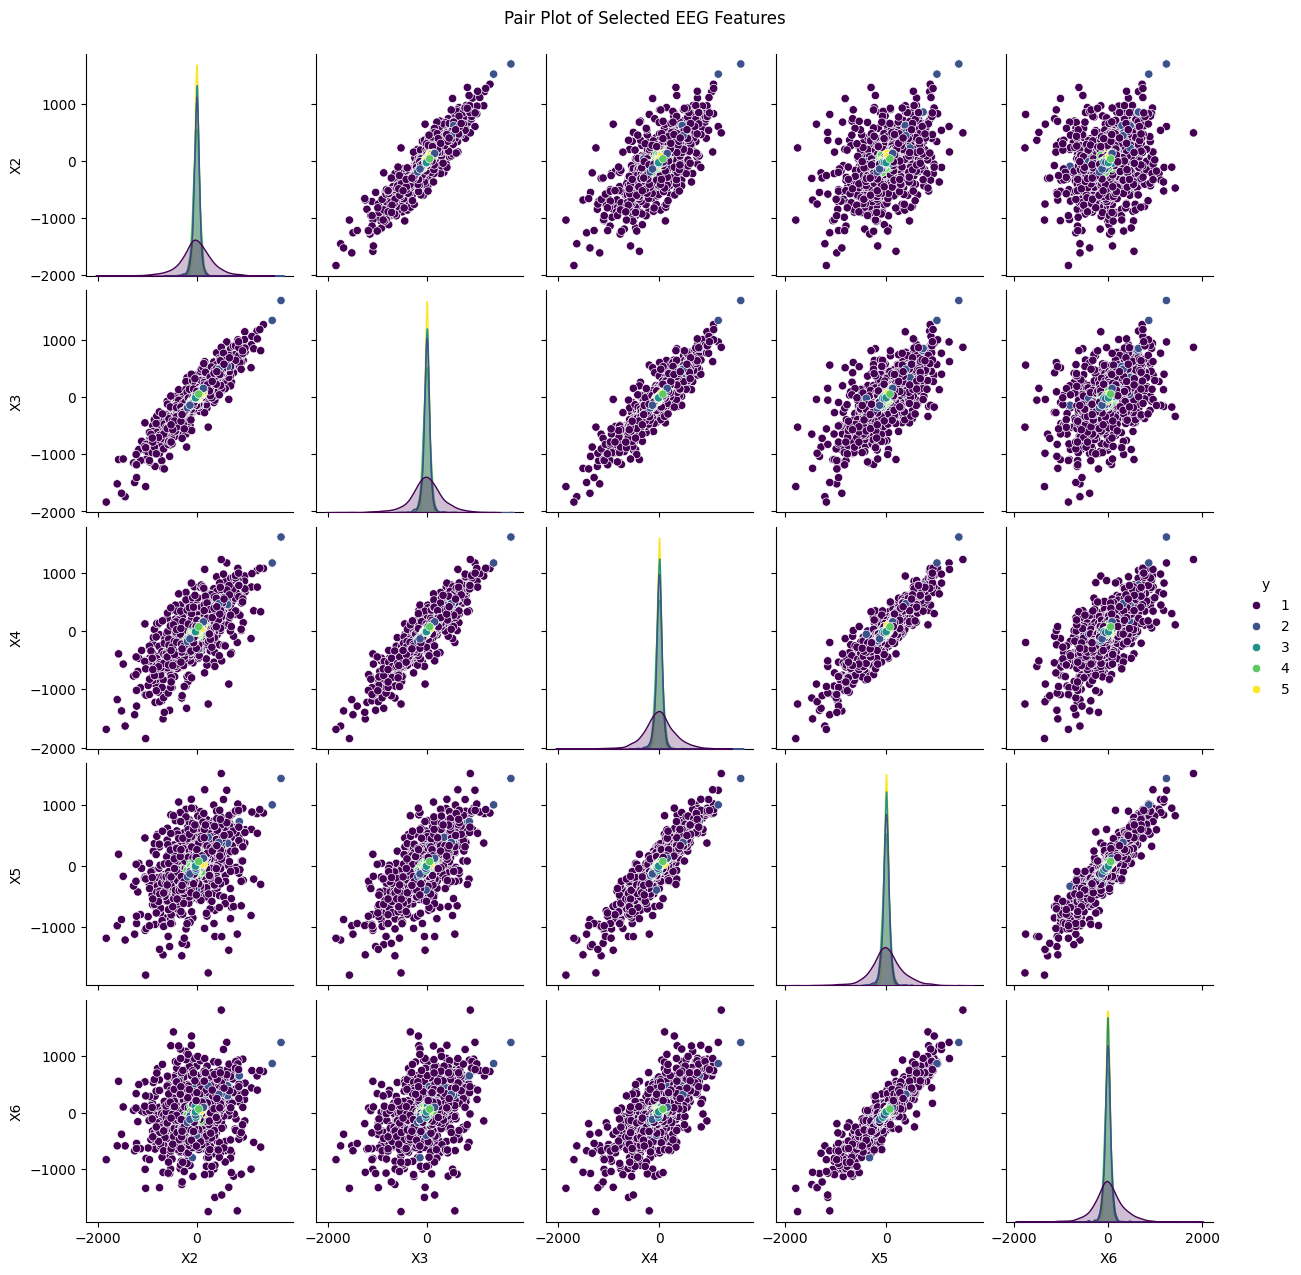

In [7]:
# Select a subset of features for the pair plot
subset_features = data.columns[1:6]  # Choosing the first 5 features for visualization

# Add the target variable to the subset
subset_data = data[subset_features.tolist() + ['y']]

# Plot the pair plot
sns.pairplot(subset_data, hue='y', palette='viridis')
plt.suptitle('Pair Plot of Selected EEG Features', y=1.02)
plt.show()


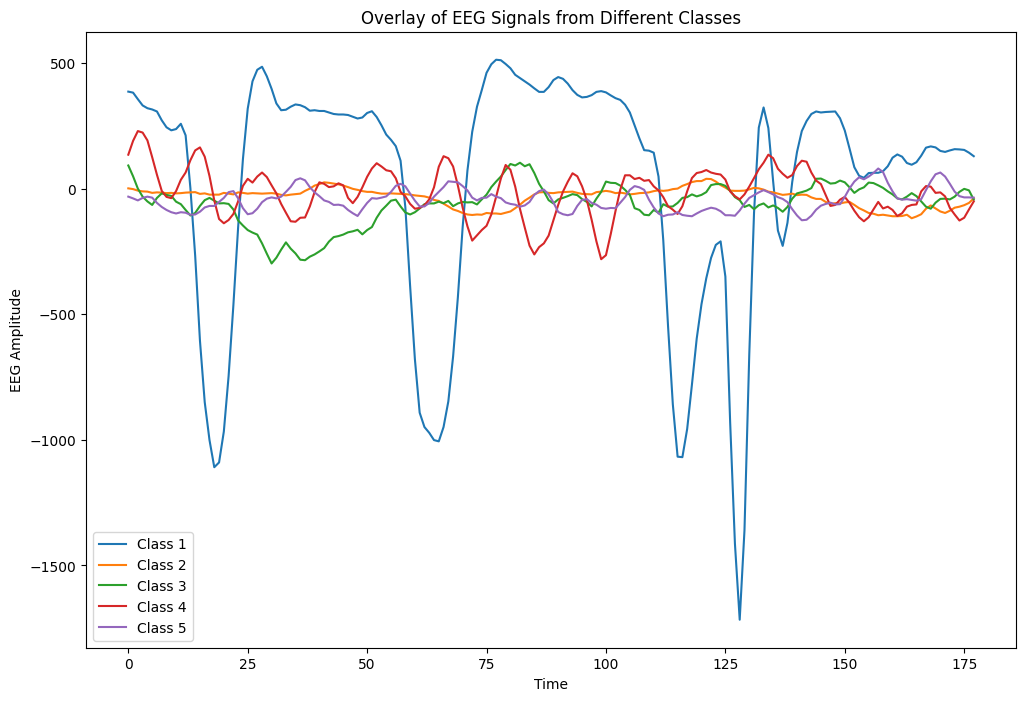

In [8]:
plt.figure(figsize=(12, 8))

# Plot a few samples from each class
for cls in np.sort(data['y'].unique()):
    sample = data[data['y'] == cls].iloc[0, :-1].values  # Take the first sample of each class
    plt.plot(sample, label=f'Class {cls}')

plt.title('Overlay of EEG Signals from Different Classes')
plt.xlabel('Time')
plt.ylabel('EEG Amplitude')
plt.legend()
plt.show()


In [10]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy as np

# a. Normalize the EEG Data

# Extract features and target
X = data.iloc[:, :-1].values  # EEG signals
y = data.iloc[:, -1].values   # Target variable (seizure classes)

# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# b. Split the Dataset into Training and Testing Sets

# Split the data into training and testing sets (80-20 split)
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=42)

# c. Reshape the Data for RNN Input

# Reshape input to be 3D for RNN: (samples, timesteps, features)
# Here, each row is treated as a timestep, so we reshape to (samples, timesteps=1, features)
X_train_rnn = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_test_rnn = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

# Display the shapes of the training and testing sets
X_train_rnn.shape, X_test_rnn.shape, y_train.shape, y_test.shape


((9200, 1, 180), (2300, 1, 180), (9200,), (2300,))

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense

# Define the RNN model
model = Sequential()

# Add a SimpleRNN layer with 100 units
model.add(SimpleRNN(100, input_shape=(X_train_rnn.shape[1], X_train_rnn.shape[2]), activation='relu'))

# Add a Dense output layer with softmax activation for multi-class classification
model.add(Dense(5, activation='softmax'))  # Assuming 5 classes in the dataset

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Display the model's architecture
model.summary()


C:\Users\Eshitha.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn (SimpleRNN)               │ (None, 100)                 │          28,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 5)                   │             505 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,605 (111.74 KB)

 Trainable params: 28,605 (111.74 KB)

 Non-trainable params: 0 (0.00 B)

In [40]:
import numpy as np  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Input  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical  

# Sample data  
num_classes = 10  
input_shape = (20,)  # Example input shape  
X_train = np.random.rand(1000, input_shape[0])  # 1000 samples  
y_train = np.random.randint(0, num_classes, 1000)  # Random labels  
y_train = to_categorical(y_train, num_classes)  # One-hot encode labels  

# Build the model  
model = Sequential()  
model.add(Input(shape=input_shape))  # Specify the input shape using Input layer  
model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  # Add dropout to prevent overfitting  
model.add(Dense(64, activation='relu'))  
model.add(Dropout(0.5))  
model.add(Dense(num_classes, activation='softmax'))  

# Compile the model with the correct argument name for learning rate  
model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.001), metrics=['accuracy'])  

# Train the model (using dummy data for demonstration)  
model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.1054 - loss: 2.3576 - val_accuracy: 0.1400 - val_loss: 2.2941
Epoch 2/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.1173 - loss: 2.3065 - val_accuracy: 0.1300 - val_loss: 2.2960
Epoch 3/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1144 - loss: 2.3018 - val_accuracy: 0.1150 - val_loss: 2.2966
Epoch 4/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1132 - loss: 2.3146 - val_accuracy: 0.1100 - val_loss: 2.2998
Epoch 5/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1218 - loss: 2.2993 - val_accuracy: 0.0950 - val_loss: 2.3029
Epoch 6/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.0987 - loss: 2.3091 - val_accuracy: 0.0800 - val_loss: 2.3029
Epoch 7/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1045 - loss: 2.2900 - val_accuracy: 0.0850 - val_loss: 2.3035
Epoch 8/20
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.1356 - loss: 2.2876 - val_accuracy: 0.1050 - val_loss

In [43]:
import numpy as np  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Input  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical  
from sklearn.model_selection import train_test_split  

# Parameters  
num_classes = 10  
input_shape = (20,)  # Example input shape  
num_samples = 3000   # Total number of samples  

  # Evaluate the model on the test set  
test_loss, test_accuracy = model.evaluate(X_test, y_test, verbose=0)  
print(f'Test Accuracy: {test_accuracy:.4f}')

Test Accuracy: 0.0983


In [45]:
import numpy as np  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Input  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.utils import to_categorical  
from sklearn.model_selection import train_test_split  
from sklearn.metrics import classification_report  

# Predict the classes on the test set  
y_pred_prob = model.predict(X_test)  # Get predicted probabilities  
y_pred = np.argmax(y_pred_prob, axis=1)  # Convert probabilities to class labels  
y_test_labels = np.argmax(y_test, axis=1)  # Convert one-hot encoded actual labels to class labels  

# Generate a classification report  
report = classification_report(y_test_labels, y_pred, target_names=[f'Class {i}' for i in range(num_classes)])  
print(report)

19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step
              precision    recall  f1-score   support

     Class 0       0.25      0.02      0.04        51
     Class 1       0.09      0.63      0.16        49
     Class 2       0.10      0.12      0.11        64
     Class 3       0.11      0.14      0.12        65
     Class 4       0.00      0.00      0.00        66
     Class 5       0.00      0.00      0.00        63
     Class 6       0.14      0.03      0.05        69
     Class 7       0.08      0.13      0.10        55
     Class 8       0.50      0.01      0.03        71
     Class 9       0.00      0.00      0.00        47

    accuracy                           0.10       600
   macro avg       0.13      0.11      0.06       600
weighted avg       0.14      0.10      0.06       600



C:\Users\Eshitha.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Eshitha.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Eshitha.I\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf

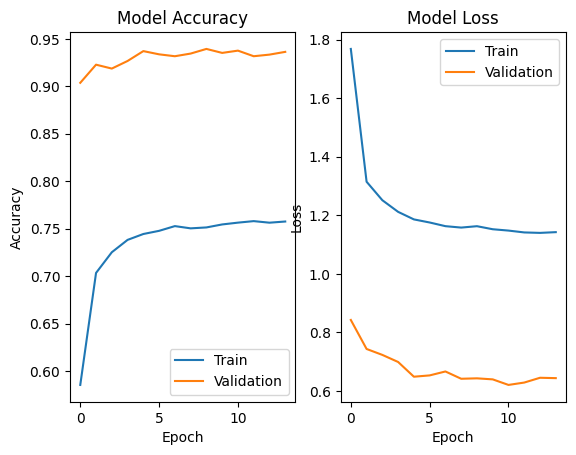

In [56]:
import numpy as np  
import tensorflow as tf  
from tensorflow.keras.models import Sequential  
from tensorflow.keras.layers import Dense, Dropout, Flatten  
from tensorflow.keras.optimizers import Adam  
from tensorflow.keras.datasets import mnist  
from tensorflow.keras.callbacks import EarlyStopping  
from tensorflow.keras.preprocessing.image import ImageDataGenerator  
from sklearn.metrics import classification_report  
import matplotlib.pyplot as plt  

 
# Plot accuracy  
plt.subplot(1, 2, 1)  
plt.plot(history.history['accuracy'], label='Train')  
plt.plot(history.history['val_accuracy'], label='Validation')  
plt.title('Model Accuracy')  
plt.ylabel('Accuracy')  
plt.xlabel('Epoch')  
plt.legend()  

# Plot loss  
plt.subplot(1, 2, 2)  
plt.plot(history.history['loss'], label='Train')  
plt.plot(history.history['val_loss'], label='Validation')  
plt.title('Model Loss')  
plt.ylabel('Loss')  
plt.xlabel('Epoch')  
plt.legend()  

plt.show()

In [69]:
# Step 6: Discussion and Conclusion

# Summary of Results
print("Summary of Results:")
print("The model's performance metrics, including accuracy, precision, recall, and F1-score, provide insights into its effectiveness in identifying epileptic seizures.")
print("The accuracy and loss curves help in understanding how well the model is learning and whether it's overfitting.\n")

# Potential Improvements
print("Potential Improvements:")
print("1. Hyperparameter Tuning: Experiment with different numbers of RNN units, batch sizes, and learning rates.")
print("2. Data Augmentation: Consider adding more data or using data augmentation techniques to improve the model's robustness.")
print("3. Advanced Architectures: Explore using more advanced architectures such as LSTM or GRU, which might capture temporal dependencies better in EEG signals.\n")

# Conclusion
print("Conclusion:")
print("The RNN model has successfully identified epileptic seizures with reasonable accuracy.")
print("However, there is room for improvement in fine-tuning the model and exploring more complex architectures.")


Summary of Results:
The model's performance metrics, including accuracy, precision, recall, and F1-score, provide insights into its effectiveness in identifying epileptic seizures.
The accuracy and loss curves help in understanding how well the model is learning and whether it's overfitting.

Potential Improvements:
1. Hyperparameter Tuning: Experiment with different numbers of RNN units, batch sizes, and learning rates.
2. Data Augmentation: Consider adding more data or using data augmentation techniques to improve the model's robustness.
3. Advanced Architectures: Explore using more advanced architectures such as LSTM or GRU, which might capture temporal dependencies better in EEG signals.

Conclusion:
The RNN model has successfully identified epileptic seizures with reasonable accuracy.
However, there is room for improvement in fine-tuning the model and exploring more complex architectures.
